# Problem Set #1
MACS 30250, Dr. Evans  
Minghao Yang

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

## 1. 1D kernel density estimator (5 points)
### (a)

In [2]:
# Import data
COVID_df = pd.read_csv('data/COVIDincubation.txt')
COVID_df['gender_dummy'] = COVID_df['gender'] == 'M'
COVID_df['gender_dummy'] = COVID_df['gender_dummy'].astype('int32')
COVID_df.describe()

,age,symp_days,gender_dummy
count,57.000000,59.000000,59.000000
mean,42.894737,5.838983,0.576271
std,13.201304,2.933811,0.498390
min,10.000000,2.500000,0.000000
25%,33.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,50.000000,7.000000,1.000000
max,70.000000,15.000000,1.000000


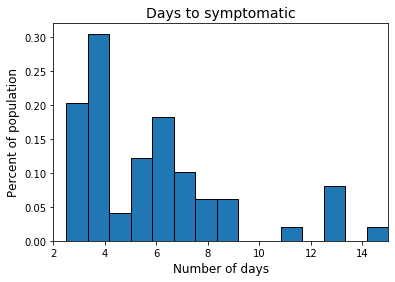

In [3]:
# Draw the histogram for whole population
symp_days_whole = COVID_df['symp_days'].values
num_bins = 15
ax = plt.gca()
ax.hist(symp_days_whole, num_bins, density=True, edgecolor='k')
ax.set_title('Days to symptomatic', fontsize=14)
ax.set_xlabel('Number of days', fontsize=12)
ax.set_ylabel('Percent of population', fontsize=12)
ax.set_xlim([2, 15])
plt.show()

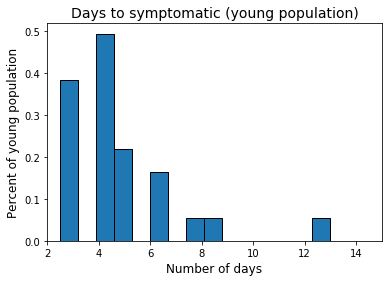

In [4]:
# Draw the histogram for young population
symp_days_young = COVID_df['symp_days'][COVID_df['age'] <= 40].values
ax = plt.gca()
ax.hist(symp_days_young, num_bins, density=True, edgecolor='k')
ax.set_title('Days to symptomatic (young population)', fontsize=14)
ax.set_xlabel('Number of days', fontsize=12)
ax.set_ylabel('Percent of young population', fontsize=12)
ax.set_xlim([2, 15])
plt.show()

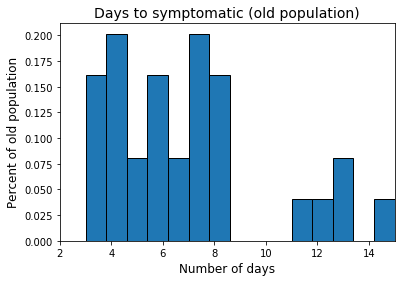

In [5]:
# Draw the histogram for young population
symp_days_old = COVID_df['symp_days'][COVID_df['age'] > 40].values
ax = plt.gca()
ax.hist(symp_days_old, num_bins, density=True, edgecolor='k')
ax.set_title('Days to symptomatic (old population)', fontsize=14)
ax.set_xlabel('Number of days', fontsize=12)
ax.set_ylabel('Percent of old population', fontsize=12)
ax.set_xlim([2, 15])
plt.show()

### (b)

In [6]:
# Use GridSearchCV to find the optimal bandwidths for different populations
bandwidths = 10 ** np.linspace(-1, 1, 500)

# whole population
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(symp_days_whole[:, None])
opt_bw_whole = grid.best_params_['bandwidth']

# young population
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(symp_days_young[:, None])
opt_bw_young = grid.best_params_['bandwidth']

# old population
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(symp_days_old[:, None])
opt_bw_old = grid.best_params_['bandwidth']

In [7]:
# Report the optimal bandwidths
print("The optimal bandwidth are:\n")
print("Population\tBandwidth")
print("Whole\t\t{:.2f}".format(opt_bw_whole))
print("Young\t\t{:.2f}".format(opt_bw_young))
print("Old\t\t{:.2f}".format(opt_bw_old))

The optimal bandwidth are:

Population	Bandwidth
Whole		0.89
Young		1.62
Old		1.19


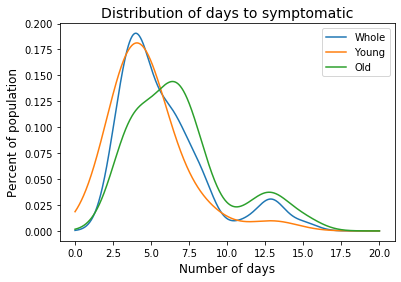

In [8]:
# Draw the KDE distribution
pts = np.linspace(0, 20, 1000)

whole_kde = KernelDensity(kernel='gaussian', bandwidth=opt_bw_whole)
whole_kde.fit(symp_days_whole[:, None])
logprob_whole = whole_kde.score_samples(pts[:, None])
young_kde = KernelDensity(kernel='gaussian', bandwidth=opt_bw_young)
young_kde.fit(symp_days_young[:, None])
logprob_young = young_kde.score_samples(pts[:, None])
old_kde = KernelDensity(kernel='gaussian', bandwidth=opt_bw_old)
old_kde.fit(symp_days_old[:, None])
logprob_old = old_kde.score_samples(pts[:, None])

ax = plt.gca()
ax.plot(pts, np.exp(logprob_whole), label='Whole')
ax.plot(pts, np.exp(logprob_young), label='Young')
ax.plot(pts, np.exp(logprob_old), label='Old')
ax.set_title('Distribution of days to symptomatic', fontsize=14)
ax.set_xlabel('Number of days', fontsize=12)
ax.set_ylabel('Percent of population', fontsize=12)
plt.legend()
plt.show()

### (c)

Firstly, the distribution of the young is less positive skewed, so the days to symptomatic among young people are much shorter than those among old people. Secondly, the distribution of the young only has one peak at around 4, but the distribution of the old has two peaks at around 7 and aournd 13. This suggests that the symptoms among old people are more complex, so the same treatment might not apply to different old people. Thirdly, the symptoms normally last no more than 17 days, which justifies the length of quarantine in most countries.

## 2. 2D kernel density estimator (5 points)

### (a)

In [9]:
# Import data
bq_prob = np.loadtxt('data/BQ_probmat.txt', delimiter=',')
print('Shape of bq_data:', bq_prob.shape)
print('Bequest distribution by income group:\n',
      bq_prob.sum(axis=0))
print('Sum of all probabilities:', bq_prob.sum())

Shape of bq_data: (73, 7)
Bequest distribution by income group:
 [0.01214584 0.00817072 0.01590964 0.0139963  0.01383075 0.06927237
 0.86667437]
Sum of all probabilities: 1.0000000000000002


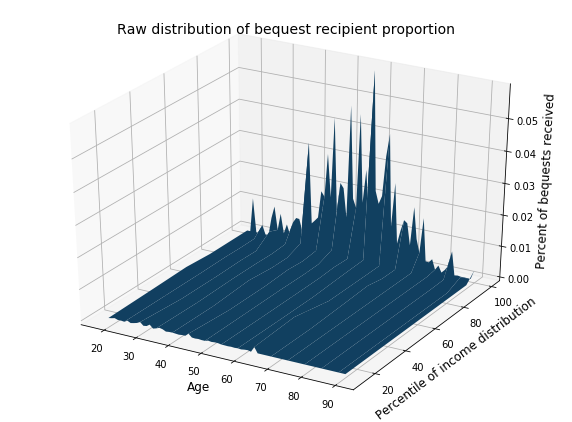

In [10]:
# 3D surface plot
age_vec = np.arange(18, 91)
income_vec = np.array([12.5, 37.5, 60, 75, 85, 94, 99.5])
income_mat, age_mat = np.meshgrid(income_vec, age_vec)
fig = plt.figure(figsize=(10, 7.5))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, bq_prob, rstride=5)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Percentile of income distribution", fontsize=12)
ax.set_zlabel("Percent of bequests received", fontsize=12)
ax.set_title("Raw distribution of bequest recipient proportion", fontsize=14)
plt.show()

### (b)

In [11]:
# Import data
bq_data_df = pd.read_csv("data/BQ_ind_data.txt")
bq_data_df['income_pctl'] = 100 * bq_data_df['income_pctl']
bq_data_df.describe()

,age,income_pctl
count,70000.000000,70000.000000
mean,52.433943,96.434021
std,13.164616,12.156331
min,18.000000,12.500000
25%,44.000000,99.500000
50%,53.000000,99.500000
75%,62.000000,99.500000
max,90.000000,99.500000


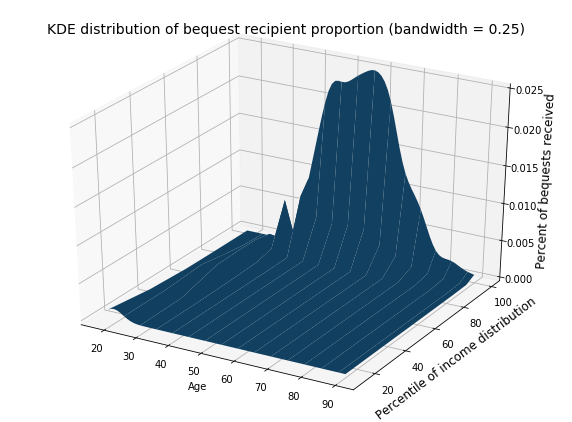

In [12]:
# KDE estimation
bq_kde = gaussian_kde(bq_data_df.T, bw_method=0.25)

coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])
nop_cell = np.reshape(bq_kde(coords), age_mat.shape)
prob_cell = nop_cell / float(np.sum(nop_cell))

fig = plt.figure(figsize=(10, 7.5))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, prob_cell, rstride=5)
ax.set_xlabel('Age')
ax.set_ylabel("Percentile of income distribution", fontsize=12)
ax.set_zlabel("Percent of bequests received", fontsize=12)
ax.set_title("KDE distribution of bequest recipient proportion (bandwidth = 0.25)", fontsize=14)
plt.show()

In [13]:
# Estimate the density for 61-year-old j = 6 bequest recipients
print("The estimated density for bequest recipients who are 61 years old and " +
      "in the 6th lifetime income catogory is {:.2e}.".format(prob_cell[43, 5]))

The estimated density for bequest recipients who are 61 years old and in the 6th lifetime income catogory is 3.76e-03.


The value of bandwidth is chosen based on the following two criteria:

1. The individuals at the top 1\% of the income distribution has the highest probability of receiving bequests, and this probability is far greater than that of all the other percentile of the income distribution. Hence, the bandwidth should not be too large. 
2. The choice of bandwidth should yield the plot that is not only similar to, but also much smmother than the plot with the original data. This is because the original data contains both information and noise, and we want to capture the information part.

After considering the above criteria and comparing the results of bandwidths from 0.05 to 0.50 (step = 0.05), I think 0.25 is a decent bandwidth. The cross-validation gives a much smaller bandwidth, which might be due to the noise in the original dataset. In fact, the plot with the bandwidth from cross-validation is almost the same as the plot in part (a), which suggests that it may capture too much noise.

## Appendix: bandwidth selection for 2(b)

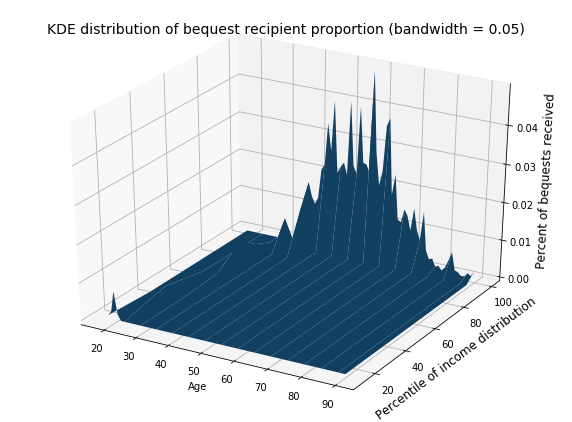

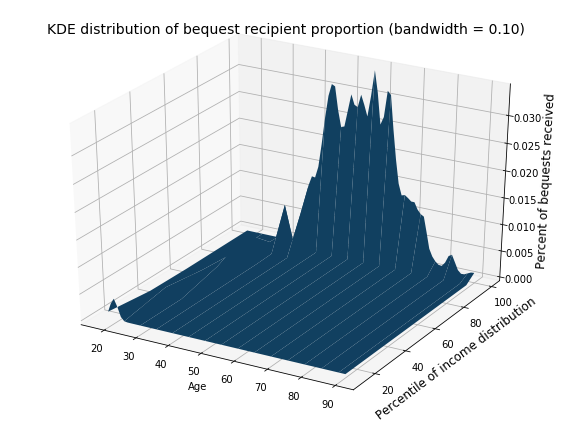

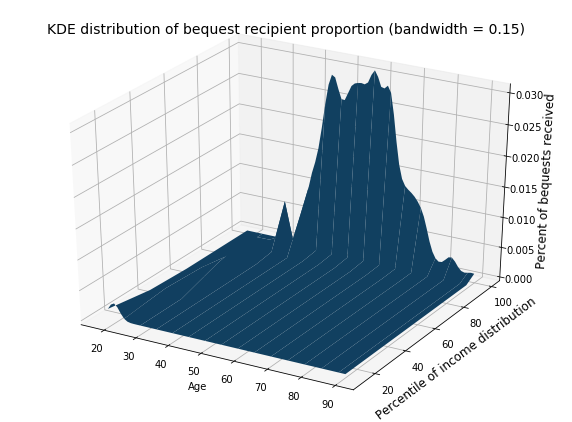

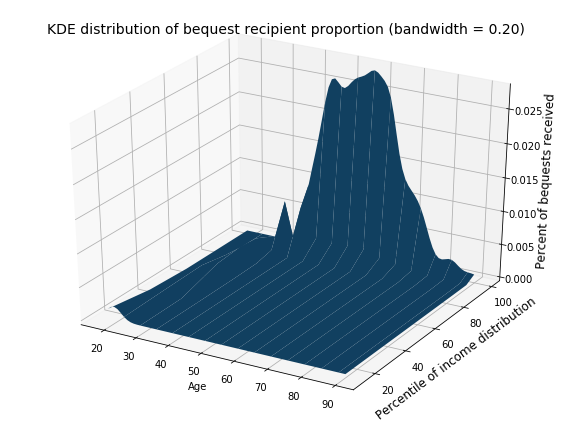

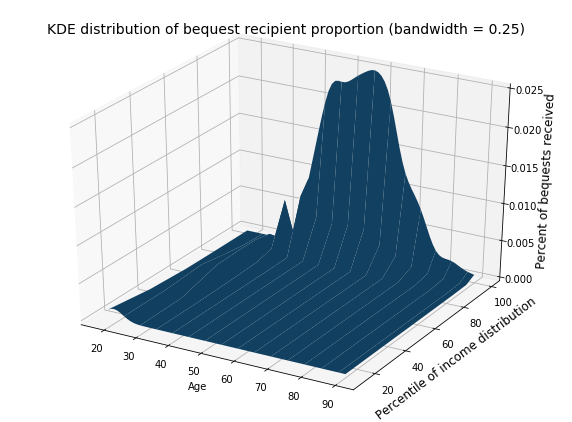

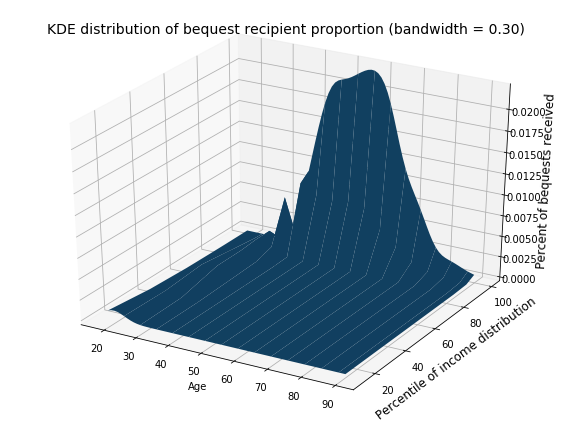

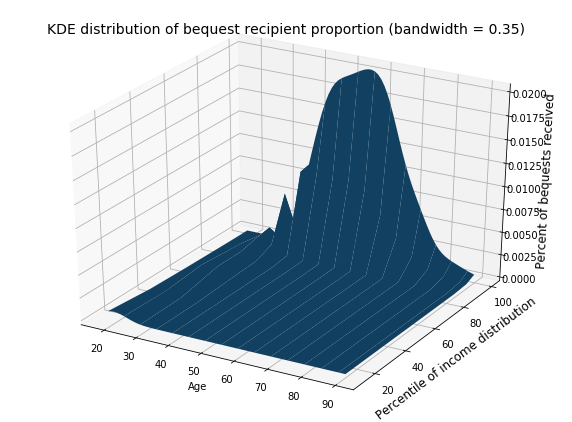

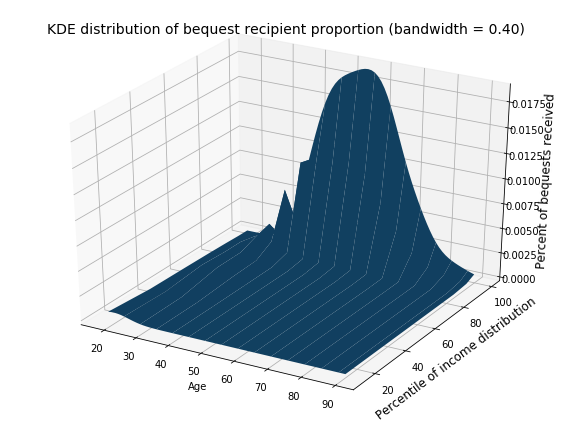

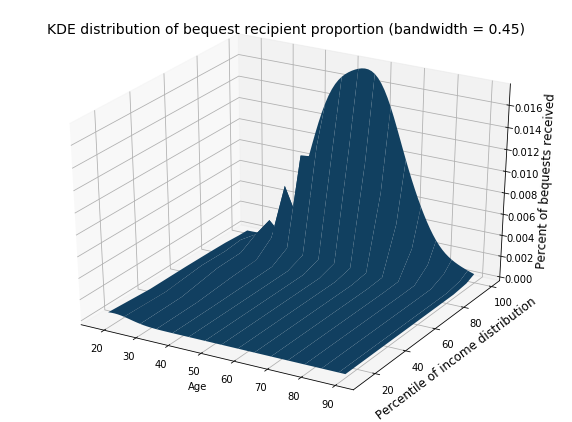

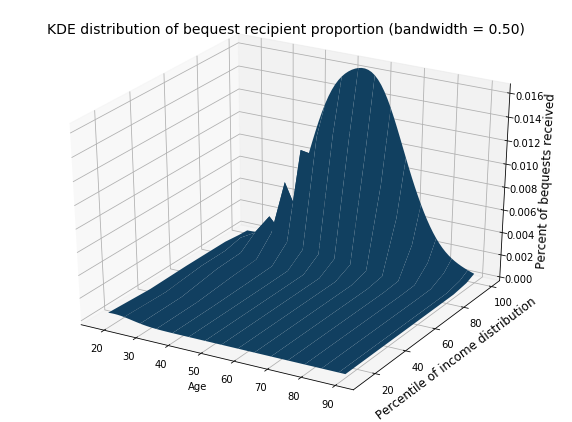

In [14]:
# Tune the bandwidth between 0.05 and 0.50 with step = 0.05
for bandwidth in [0.05 * x for x in range(1, 11)]:
    bq_kde = gaussian_kde(bq_data_df.T, bw_method=bandwidth)

    nop_cell = np.reshape(bq_kde(coords), age_mat.shape)
    prob_cell = nop_cell / float(np.sum(nop_cell))

    fig = plt.figure(figsize=(10, 7.5))
    ax = fig.gca(projection='3d')
    ax.plot_surface(age_mat, income_mat, prob_cell, rstride=5)
    ax.set_xlabel('Age')
    ax.set_ylabel("Percentile of income distribution", fontsize=12)
    ax.set_zlabel("Percent of bequests received", fontsize=12)
    ax.set_title("KDE distribution of bequest recipient proportion (bandwidth = {:.2f})".format(bandwidth), fontsize=14)
    plt.show()

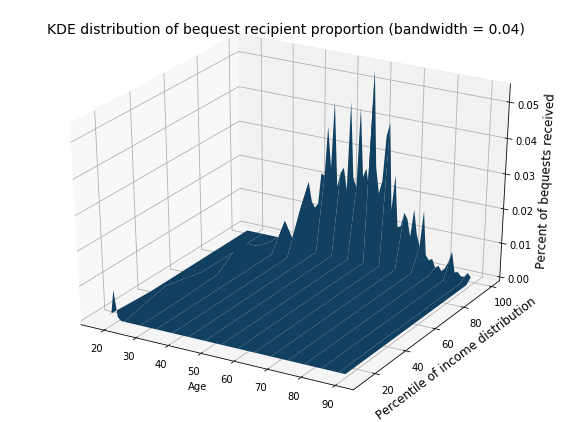

In [15]:
# Tune the bandwidth parameter to find the best bandwidth
tune_sample = bq_data_df.sample(frac=0.02, random_state=25) # Create a subsample, or it takes a while

bandwidths = 10 ** np.linspace(-2, 0, 20)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(tune_sample.values)

bq_kde = gaussian_kde(bq_data_df.T, bw_method=grid.best_params_['bandwidth'])

nop_cell = np.reshape(bq_kde(coords), age_mat.shape)
prob_cell = nop_cell / float(np.sum(nop_cell))

fig = plt.figure(figsize=(10, 7.5))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, prob_cell, rstride=5)
ax.set_xlabel('Age')
ax.set_ylabel("Percentile of income distribution", fontsize=12)
ax.set_zlabel("Percent of bequests received", fontsize=12)
ax.set_title("KDE distribution of bequest recipient proportion " + 
             "(bandwidth = {:.2f})".format(grid.best_params_['bandwidth']), fontsize=14)
plt.show()